
# Advisory mission for the Boston municipal authorities


![title](assets/boston_logo.png)

Welcome to the Decision Science exercise of your data certification exam!

Here are a few words to describe how the `decision_science` directory is organised:

In [16]:
# Start by running this cell to see the architecture of the directory
!tree

.
├── README.md
├── boston_crimes.ipynb
├── boston_crimes.py
├── data
│   ├── boston_crimes.sqlite
│   └── soccer.sqlite
├── data.py
├── db
│   ├── boston_crimes.sqlite
│   └── boston_crimes.xml
└── tests

3 directories, 8 files


- the `boston_crimes.ipynb` notebook that you currently have under your eyes is the main document. You will find all the instructions here and except when it is explicitly specified, you should provide all your answers in this notebook;


- the `data` and `db` folders will be filled-in throughout the exercise respectively with `.csv` datasets and a `.sqlite` file, for you to run all your analyses; 


- you will not have to interact with the `assets` folder for this exercise;


- the `tests` folder will contain all the `.pickle` files that will be saved throughout the exercise with your key findings. Please run all the "Save your results" cells when completing the exercise!

⚠️ **Important remark** before you dive into the exercise. This notebook is quite long and it is easy to get lost in it: take full advantage of the collapsible headers and of the table of content. If you have not yet activated these Jupyter Notebook extensions, you may consider doing so now!

# Imports

You can use this section to run your imports in a centralised manner throughout the exercise.

In [2]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

In [3]:
# Useful import for data collection
import sqlite3

In [4]:
# Useful imports for data manipulation and analysis
import numpy as np
import pandas as pd

In [5]:
# Useful imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Useful imports to estimate regression models
import statsmodels.formula.api as smf

# 1. Analysis for the mayor's team

During the last municipal campaign in Boston, criminality has been a major topic of debates. As citizens have expressed strong expectations from her on that front, the newly-elected mayor of Boston is looking for data-based insights on criminality in the Massachussetts capital. She has mandated your economics and urbanism consulting firm, *The Locomotive*, for this study.

## 1.1 Load the database

Download the `boston_crimes.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes.sqlite) and store it inside the `db` folder.

In [7]:
# You may directly run this cell to do so
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes.sqlite > db/boston_crimes.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.1M  100 19.1M    0     0  1740k      0  0:00:11  0:00:11 --:--:-- 2062k


## 1.2 Familiarize yourself with the database

This section aims at giving you a first overview of the database. 

As you will see, it consists in three tables: 

- the `incident_reports` table has been provided by the Police Department of Boston. Each observation corresponds to a criminal incident that has required an intervention by the police in the municipality of Boston;  



- the `districts` table has been provided by the Urbanism Department of Boston. It gathers geographical information about the various police districts of Boston;  



- and the `indicators` table has been shared by the Economics Department of Boston, which keeps track of various indicators of the social and economic activity of Boston neighborhoods. Each observation corresponds to a police district.

More information about the different fields of these three tables can be found in the dedicated `README.md` file

### Connect to the database

**🔍 Using your preferred SQL client, connect to the database and browse through it as you wish to get acquainted with the data.**

### Draw a schema of the database

**📝 Draw the database schema thanks to the [schema editor](https://kitt.lewagon.com/db) on Kitt.**

**📝 Download the schema and save it as `boston_crimes.xml` in the `db` folder.**

## 1.3 Extract the relevant dataset

Now that you have a good overview of the database, you can kick off the work! You will start with an SQL query to gather the relevant information.

### Build the dataset

We want to investigate the influence of the socio-economic characteristics of Boston's different districts on the number of crime reports and incidents. To do so, we need to extract the relevant dataset. **Each row should correspond to one of the 12 police districts of Boston** (as listed in the `districts` table of the database).

To identify the district, we will need **the following columns**: 

- the `CODE` of the police district (1 letter and 1 or 2 numbers);
- the full `NAME` of the police district.

Additionally, you will need to **create an additional field** (which will serve as dependent variable in future regressions): `NB_INCIDENTS`, i.e. the total number of incidents reported in the police district over the period covered by the data at hand (2015-2019).

Eventually, we want the dataset to **include several socio-economic indicators**:

- `MEDIAN_AGE`;
- `TOTAL_POP`;
- `PERC_OF_30_34`;
- `PERC_MARRIED_COUPLE_FAMILY`;
- `PER_CAPITA_INCOME`;
- `PERC_OTHER_STATE_OR_ABROAD`;
- `PERC_LESS_THAN_HIGH_SCHOOL`;
- `PERC_COLLEGE_GRADUATES`. 

Overall, your dataset should comprise 12 rows and 11 columns.

Eventually, note that **the resulting DataFrame must be ordered by the number of incidents**, from the largest to the smallest total.

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [14]:
query = """WITH incident_districts AS (
SELECT DISTRICT, COUNT(INCIDENT_NUMBER) AS NB_INCIDENTS
FROM incident_reports
GROUP BY DISTRICT
) 


SELECT d.CODE, d.NAME, incident_districts.NB_INCIDENTS, MEDIAN_AGE, TOTAL_POP, PERC_OF_30_34, PERC_MARRIED_COUPLE_FAMILY, PER_CAPITA_INCOME,
PERC_OTHER_STATE_OR_ABROAD, PERC_LESS_THAN_HIGH_SCHOOL, PERC_COLLEGE_GRADUATES
FROM districts d
LEFT JOIN incident_districts
  ON d.CODE = incident_districts.DISTRICT
LEFT JOIN indicators i 
  ON d.CODE = i.CODE
ORDER BY NB_INCIDENTS DESC;
"""

**📝 Store the output of the query in a `DataFrame` named `crimes_df`. Display the 5 first rows, as well as the shape of the dataset.**

In [33]:
#conn = sqlite3.connect('data/boston_crimes.sqlite')
#c = conn.cursor()

#c.execute(query)
#rows = c.fetchall()
#rows
##OperationalError: no such table: districts ; but works on DBeaver ...

In [37]:
records = [('B2', 'Roxbury', 38877, 32.5, 54161, 27.8, 17.8, 20978, 2.9, 23., 18.9),
 ('C11', 'Dorchester', 32875, 33.4, 126909, 28.2, 26.6, 29767, 2.4, 18., 17.1),
 ('D4', 'South End', 31258, 37.1, 32571, 33.9, 28.3, 83609, 6.2, 11.8, 8.5),
 ('B3', 'Mattapan', 28331, 36.7, 26659, 20.9, 29.8, 28356, 2.3, 14.5, 22.9),
 ('A1', 'Downtown', 26260, 33.5, 18306, 32.5, 35.8, 80057, 14.8, 15.4, 6.9),
 ('C6', 'South Boston', 16617, 31.9, 36772, 46.1, 24.7, 64745, 2.4, 7.9, 8.4),
 ('D14', 'Brighton', 13788, 30.8, 55297, 52.8, 26.4, 41261, 8.6, 6.7, 10.5),
 ('E13', 'Jamaica Plain', 12802, 34.8, 40867, 32.5, 33.7, 51655, 5.5, 8., 12.1),
 ('E18', 'Hyde Park', 12551, 39.4, 38924, 21.1, 38.4, 32744, 1.9, 13.8, 21.3),
 ('A7', 'East Boston', 9691, 30.6, 47263, 31.1, 30.4, 31473, 3.5, 27.2, 11.5),
 ('E5', 'West Roxbury', 9406, 42.8, 33526, 18.1, 46.2, 47836, 1.9, 6.5, 13.2),
 ('A15', 'Charlestown', 4765, 35.7, 19890, 28.2, 36.4, 75339, 3.4, 7.9, 8.2)]

In [39]:
cols = ['CODE', ' NAME', ' incident_districts.NB_INCIDENTS', ' MEDIAN_AGE',
       ' TOTAL_POP', ' PERC_OF_30_34', ' PERC_MARRIED_COUPLE_FAMILY',
       ' PER_CAPITA_INCOME', 'PERC_OTHER_STATE_OR_ABROAD',
       ' PERC_LESS_THAN_HIGH_SCHOOL', ' PERC_COLLEGE_GRADUATES']

In [43]:
crimes_df = pd.DataFrame(records, columns=cols)
crimes_df.head()

,CODE,NAME,incident_districts.NB_INCIDENTS,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES
0,B2,Roxbury,38877,32.5,54161,27.8,17.8,20978,2.9,23.0,18.9
1,C11,Dorchester,32875,33.4,126909,28.2,26.6,29767,2.4,18.0,17.1
2,D4,South End,31258,37.1,32571,33.9,28.3,83609,6.2,11.8,8.5
3,B3,Mattapan,28331,36.7,26659,20.9,29.8,28356,2.3,14.5,22.9
4,A1,Downtown,26260,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9


In [45]:
crimes_df.shape

(12, 11)

### Save your results

You can run the following cell to save your results:

In [46]:
ChallengeResult('sql', query=query, data=crimes_df).write()

## 1.4 Linear regression - The socio-economic determinants of criminality

As mentioned above, we want to investigate the impact of the socio-economic characteristics of the different Boston police districts on the number of incidents that are reported in these areas. 
- We are going to use the number of incidents as dependent variable 
- our regressors will be the various socio-economic indicators extracted from the database.

### 1.4.1 Start from a fresh dataset

To make sure that you are using the right data, you can load a fresh dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/regression.csv).

**📝 Load the data into a DataFrame named `data`**

In [48]:
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes_regression.csv')
data

,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES,CODE,NB_INCIDENTS,NAME
0,30.8,55297,52.8,26.4,41261,8.6,6.7,10.5,D14,13788,Brighton
1,35.7,19890,28.2,36.4,75339,3.4,7.9,8.2,A15,4765,Charlestown
2,33.4,126909,28.2,26.6,29767,2.4,18.0,17.1,C11,32875,Dorchester
3,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9,A1,26260,Downtown
4,30.6,47263,31.1,30.4,31473,3.5,27.2,11.5,A7,9691,East Boston
5,39.4,38924,21.1,38.4,32744,1.9,13.8,21.3,E18,12551,Hyde Park
6,34.8,40867,32.5,33.7,51655,5.5,8.0,12.1,E13,12802,Jamaica Plain
7,36.7,26659,20.9,29.8,28356,2.3,14.5,22.9,B3,28331,Mattapan
8,32.5,54161,27.8,17.8,20978,2.9,23.0,18.9,B2,38877,Roxbury
9,31.9,36772,46.1,24.7,64745,2.4,7.9,8.4,C6,16617,South Boston


### 1.4.2 Run the regression and output its summary

Thanks to the Statsmodels Formula API, we will run the regression described below. 

The dependent variable (or target variable) should be **the total number of incidents** reported in each police district.

We will focus on the following regressors: 

- the **median age** in the district, whose effect is difficult to anticipate on the number of crimes;
 
 
- the **percentage of 30-34 years old** in the district, whose effect is also unclear a priori;
 
 
- the **share of families with a married couple** among all households, which could be anticipated to have a negative effect on criminality (more attention to safety among residents...);
 
 
- the **percentage of residents having moved from abroad or from another US state over the last year**, mobility being often associated with social marginalisation and possibly with a higher risk of resorting to illegal activities;
 
 
- the **percentage of residents having stopped their studies before getting a high school degree**. Economic models would suggest that due to the more narrow job opportunities to which this group has access, the incentive is stronger to resort to illicit activities;
 
 
- the **percentage of college graduates** in the district, which we would expect to have an opposite effect.
 
**📝 Based on these indications, estimate the linear regression model and output its summary in this section of the notebook. Store the estimated model inside a `model` variable.**

In [50]:
features = ['MEDIAN_AGE', 'PERC_OF_30_34','PERC_MARRIED_COUPLE_FAMILY', 'PERC_OTHER_STATE_OR_ABROAD', 
 'PERC_LESS_THAN_HIGH_SCHOOL', 'PERC_COLLEGE_GRADUATES']

In [54]:
# instanciate a model
model = smf.ols(formula='NB_INCIDENTS ~ MEDIAN_AGE + PERC_OF_30_34 + PERC_MARRIED_COUPLE_FAMILY +\
                        PERC_OTHER_STATE_OR_ABROAD + PERC_LESS_THAN_HIGH_SCHOOL + PERC_COLLEGE_GRADUATES', data=data)

# train the model to find best line
model = model.fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           NB_INCIDENTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     7.391
Date:                Tue, 29 Jun 2021   Prob (F-statistic):             0.0222
Time:                        10:39:32   Log-Likelihood:                -114.59
No. Observations:                  12   AIC:                             243.2
Df Residuals:                       5   BIC:                             246.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/Users/alexisgourdol/.pyenv/versions/3.8.6/envs/lewagon386/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Save your results

You can run the following cell to save your results:

In [55]:
ChallengeResult(
    'linear_regression_model',
    data=data,
    model=model
).write()

### 1.4.3 Statistical inference questions 🤯

You will now be asked a series of statistical inference and methodological questions about the regression model estimated above. Don't worry if results do not perfectly fit the "predictions" that we made earlier about the impact of each regressor: the goal was to form an *a priori* hypothesis, which is validated or invalidated through this empirical analysis.

#### Questions on the results

**❓ Is the median age associated with a positive (increasing the number of crimes) or a negative (decreasing the target variable) effect on the number of crime incidents? Simply write your answer as a string below**

In [86]:
answer_median_age = '''The median age is associated with a positive effect on the number of crime incidents
as the coefficient is positive (2252.7344)
'''

**❓ What is the t-statistic associated with the median age regressor? How is it computed?**

💡 Hint: We are looking at a ratio

In [87]:
answer_t_statistic = '''The t-statistic value of the model for the median age is 1.820 
By definition we calculate the following ratio:
1. Deduct the parameter to estimate (mu) from the sample mean (Xbar)
2. Divide the sample standard deviation (s) by the square root of the number of observations (n)
3. Divide (1.) by (2.)
T-statistic is used when the sample size is small and we can't use the z-tests to read the p-value 
(to accept or reject the null hypothesis)
'''

**📝 Recompute approximately the t-statistic based on the regression summary.**

As it is a ratio $t = \frac{numerator}{denominator}$:
- Store the numerator into a `numerator` variable
- Store the denominator into a `denominator` variable
- Store the t-statistic into a `t_median_age` variable

In [102]:
mu = 19750
Xbar = data.NB_INCIDENTS.mean()
numerator = Xbar - mu
numerator

18.41666666666788

In [107]:
n = data.shape[0]
s = data.MEDIAN_AGE.mean()
denominator = s / (n**0.5)
denominator

10.084384701845464

In [108]:
t_median_age = numerator / denominator
t_median_age

1.8262558610340986

**❓ What is the p-value associated with the median age regressor? Store it in the `pvalue_median_age` variable (you may directly copy-paste it from the regression summary).** 

In [90]:
pvalue_median_age = 0.128
"""The pvalue for the median age is 0.128"""

'The pvalue for the median age is 0.128'

**❓ What does this p-value mean for the median age? Is its effect statistically significant at the 95% confidence level? At the 90% confidence level? Simply formulate your answer in the cell below.**

In [91]:
answer_p_value = """
The p-value tells us how likely it is that we observe the result by pure chance. 
Typically the threshold for the p-value is set to 5%, which would mean that our results are statistically 
significant with a confidence level of 95%. 
Here it is not the case, not even at 90%. 

Our results would only be statistically significant at a 87% confidence level."""

**❓ What are the two regressors whose effect is statistically significant at the 95% confidence level in this regression model? Store the name of the variables as a list of strings in the `significant_regressors` variable.**

In [92]:
significant_regressors = ['PERC_MARRIED_COUPLE_FAMILY', 'PERC_OTHER_STATE_OR_ABROAD']

**❓ Holding all other regressors constant, by how much does the total number of incidents increase or decrease when the share of families with a married couple increases by 1 percentage point in the district? Please formulate a full sentence with statistical rigor!**

In [93]:
answer_how_much_increase = """
Holding all other regressors constant, the total number of incidents decrease by 2115.1839
when the share of families with a married couple increases by 1 percentage point in the district
"""


#### Limits of this regression model

You had asked the intern on the team to estimate a linear regression model so as to investigate the socio-economic determinants of crime in Boston. The results above are those that he presented. In the email he sent to you, he added:

> *You will probably notice the extremely high R-squared score of this model: I think we have an excellent fit and the results are solid* 😄

But you have very strong doubts about this regression and you think it is a perfect occasion to give some very important advice to your intern...

**❓  What is the main limitation of this (clearly spurious) regression according to you? This observation explains why we are getting a very high R-squared and large standard errors. Please provide your answer in the following Markdown cell.**

In [94]:
data

,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES,CODE,NB_INCIDENTS,NAME
0,30.8,55297,52.8,26.4,41261,8.6,6.7,10.5,D14,13788,Brighton
1,35.7,19890,28.2,36.4,75339,3.4,7.9,8.2,A15,4765,Charlestown
2,33.4,126909,28.2,26.6,29767,2.4,18.0,17.1,C11,32875,Dorchester
3,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9,A1,26260,Downtown
4,30.6,47263,31.1,30.4,31473,3.5,27.2,11.5,A7,9691,East Boston
5,39.4,38924,21.1,38.4,32744,1.9,13.8,21.3,E18,12551,Hyde Park
6,34.8,40867,32.5,33.7,51655,5.5,8.0,12.1,E13,12802,Jamaica Plain
7,36.7,26659,20.9,29.8,28356,2.3,14.5,22.9,B3,28331,Mattapan
8,32.5,54161,27.8,17.8,20978,2.9,23.0,18.9,B2,38877,Roxbury
9,31.9,36772,46.1,24.7,64745,2.4,7.9,8.4,C6,16617,South Boston


In [95]:
answer_limitations = """
The regression is based on only 12 observations. 
We would need more data to actually have a good performing model (e.g. increase granularity).

Also, the summary indicate that most of the features are not reliable (high p-value),
which means that their predictive power is doubtful at best.
"""

### Save your results

You can run the following cell to save your results:

In [109]:
import json
answers_inference = {"MEDIAN_AGE": answer_median_age,
                    "T_STAT":answer_t_statistic,
                     "P_VALUE": answer_p_value,
                     "INCREASE": answer_how_much_increase,
                     "LIMITATIONS": answer_limitations}

with open("tests/answers_inference.json", "w", encoding="utf-8") as f:
    json.dump(answers_inference, f, ensure_ascii=False, indent=4)

ChallengeResult(
    'linear_regression_analysis',
    model=model,
    numerator=numerator,
    denominator=denominator,
    t=t_median_age,
    pvalue=pvalue_median_age,
    regressors=significant_regressors
).write()

# 2. Analysis for the police department

The head of the Police Department of Boston, who read your report for the Mayor's team, was extremely interested in the results. He contacted your consulting firm for an additional presentation, that would focus on the nature of crimes that take place in Boston, the potential time trends that you could identify and/or the heterogeneity of the impact of criminality on the different police districts. 

## 2.1 Start with a fresh dataset

You will start from a fresh dataset, that corresponds more or less to the `incident_reports` table of the database.

In [110]:
# Run this cell to download the datasets in the data directory
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/incident_reports.csv > data/incident_reports.csv   
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/districts.csv > data/districts.csv    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.1M  100 19.1M    0     0  1578k      0  0:00:12  0:00:12 --:--:-- 1772k 0:00:10 1583k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   498  100   498    0     0   3635      0 --:--:-- --:--:-- --:--:--  3661


In [111]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


## 2.1 Further data manipulations

In this section, we are going to answer two specific questions that the head of the Police Department of Boston asked your team, about the characteristics of the incidents that occur in the various districts of the municipality.

### 2.1.1 Most represented type of incident per district

First, the head of the Police Department of Boston wants to know what incident category is most often found in each district. 

**📝 Construct a DataFrame with**
- **one row per police district, designated by its full name**
- **one text column that indicates the name of the most common category of incident in the district over the whole sample period.**

💡 Hint: you may need to first define a custom aggregation function.

In [170]:
data.groupby(['NAME', 'OFFENSE_CODE_GROUP'],sort=True).count().INCIDENT_NUMBER.to_frame()

INCIDENT_NUMBER
NAME         OFFENSE_CODE_GROUP                             
Brighton     Disputes                                    563
             Drugs and disorderly conduct                809
             Fraud and law violations                   1807
             Larceny and vandalism                      5274
             Other                                       925
...                                                      ...
West Roxbury Fraud and law violations                   1168
             Larceny and vandalism                      2915
             Other                                       880
             Police investigation procedure             2036
             Violence and harassment                    1089

[84 rows x 1 columns]

In [185]:
#data.groupby(['NAME', 'OFFENSE_CODE_GROUP'], group_keys=False).count().INCIDENT_NUMBER.nlargest(data.NAME.nunique()*2)

**❓ Can you tell what is the second most common offense int the Brighton district?**

In [156]:
second_most_common_offence = "Police investigation procedure"

### Average distance to the police station per district

Second, based on the Haversine distance function defined below, the head of the Police Department would like to know, for each district, **the average distance between the location of the incident and the police station**. 

**📝 Construct a DataFrame with one row per police district, designated by its full name, and one column that displays this average Haversine distance.**

In [186]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [221]:
distance_df = data.copy()
distance_df['AVG_DISTANCE'] = distance_df[['LAT', 'LONG', 'LAT_POLICE_STATION', 'LONG_POLICE_STATION']].apply(lambda x: haversine_distance(*x), axis=1)
distance_df = distance_df.groupby(['NAME']).mean()[['AVG_DISTANCE']].sort_values(by='AVG_DISTANCE', ascending=False)
distance_df

,AVG_DISTANCE
NAME,
Charlestown,57.206177
South Boston,30.835665
West Roxbury,18.178571
Downtown,5.981918
East Boston,5.416621
Brighton,3.903264
Dorchester,2.730074
Roxbury,2.665766
Jamaica Plain,2.169588


No handles with labels found to put in legend.


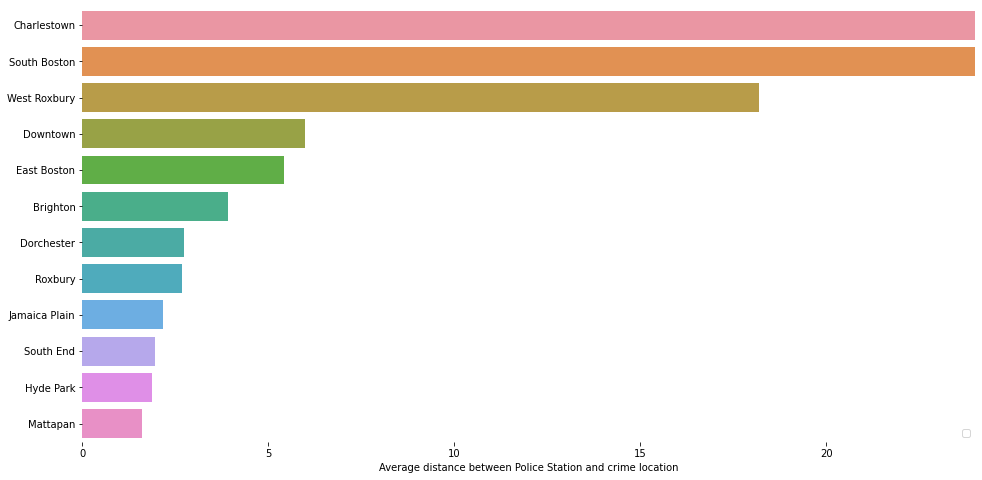

In [ ]:
# Plot the total crashes
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

**❓ Can you tell what is the average distance between the police station and the offenses in the Brighton district?**

In [206]:
average_distance_km = 3.903264

In [207]:
result = ChallengeResult('manipulation',
                         second_most_common_offence=second_most_common_offence,
                         average_distance_km=average_distance_km)
result.write()

# 3. Short presentation (REQUIRED TO VALIDATE THE CERTIFICATION)
🚨🚨🚨🚨🚨🚨

Using the latest dataset that you loaded, your mission is now to prepare 5 slides (including a title slide) that you would present to the head of the Police Department. You may or may not, as you prefer, include the output of the two "Further data manipulations" tasks in your presentation.

⚠️  You can use any presentation editor of your choice, but **the slides must be shared either in HTML or in PDF format and saved in the current directory**

Before you get started, here are four small pieces of advice:

- to prepare your data visualisations, do not hesitate to create a separate, blank notebook; 


- pay particular attention to the readability and the clarity of your legends, titles, charts and tables; 


- the Pandas `resample` method might be useful if you want to plot time trends;


- keep in mind that you are working with real data and sometimes, data are not very talkative. Do not feel discouraged if your charts do not provide revolutionary insights: typically, an absence of trend is a substantial piece of information!

Good luck in changing Boston residents' lives!

# A word of conclusion

Congratulations for going through the exercise 🎉

If you wish to pursue your analysis at some point, note that all datasets (and many others) are publicly available online, on the [Analyze Boston](https://data.boston.gov) website.

Besides, if you are interested in the topic, you can start by reading the work of Nobel Prize laureate Gary Becker, who was the first to model crime as a rational phenomenon, similarly to an economic decision. This model, although it has limitations, marked a breakthrough in the study of crime and paved the way for many empirical studies that further analysed the socio-economic determinants of illegal activities. 

👉 [Link](https://olis.leg.state.or.us/liz/2017R1/Downloads/CommitteeMeetingDocument/125036) to download a full-text version of "Crime and Punishment: An Economic Approach" by Becker (1968)